<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/%D0%9B%D0%90%D0%915%D0%94%D1%96%D0%BA%D1%83%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


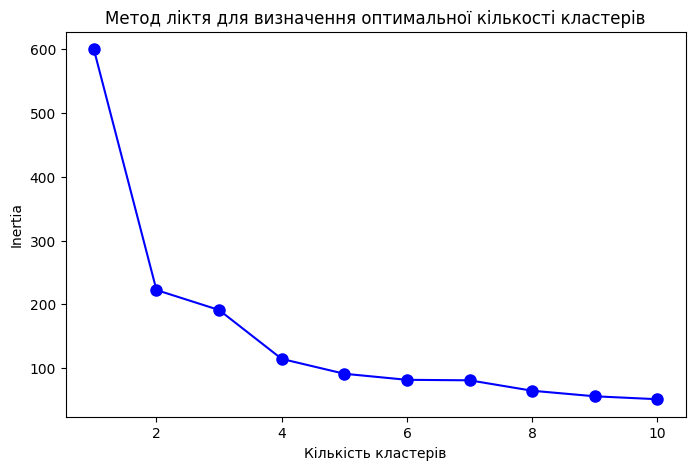

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.show()


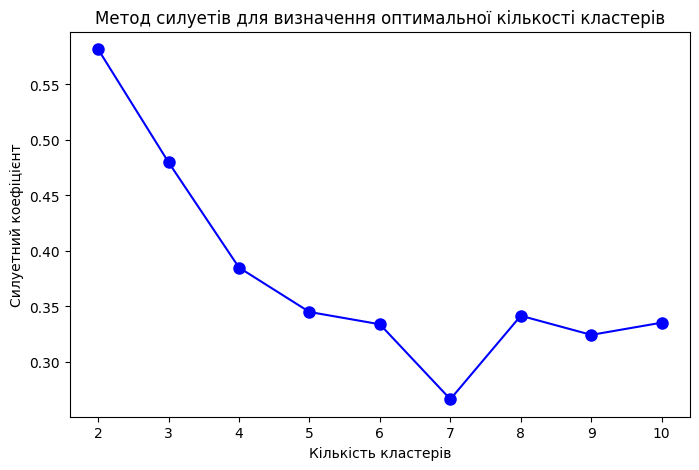

In [3]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(iris_scaled)
    score = silhouette_score(iris_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів')
plt.show()

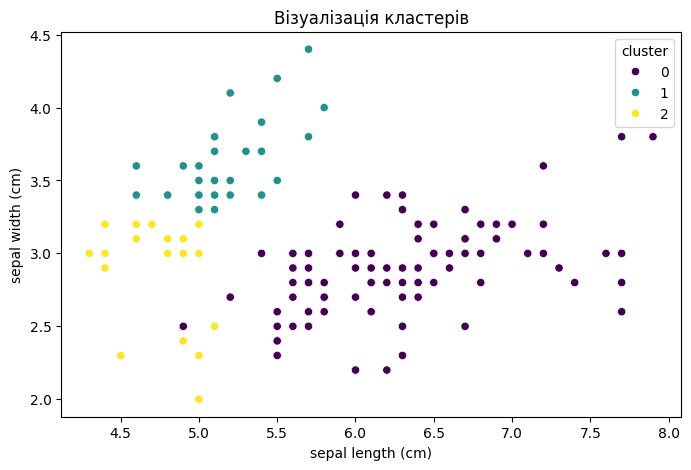

In [4]:
import seaborn as sns
import numpy as np

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['cluster'], palette='viridis')
plt.title('Візуалізація кластерів')
plt.show()